In [131]:
import numpy as np # type: ignore 
import pandas as pd # type: ignore 
import matplotlib.pyplot as plt  # type: ignore
import nltk # type: ignore
import seaborn as sns # type: ignore
from nltk.corpus import stopwords # type: ignore
from nltk.stem.porter import PorterStemmer # type: ignore
from wordcloud import WordCloud
from collections import Counter

In [132]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [133]:
df = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

In [134]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
6067,spam,Microsoft has detected a virus on your compute...
6068,spam,Invest in our new cryptocurrency and earn 100%...
6069,spam,"Hi, I saw your profile and I think we have a l..."
6070,spam,Complete this short survey and win a $100 gift...


In [135]:
df.sample

<bound method NDFrame.sample of         v1                                                 v2
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
6067  spam  Microsoft has detected a virus on your compute...
6068  spam  Invest in our new cryptocurrency and earn 100%...
6069  spam  Hi, I saw your profile and I think we have a l...
6070  spam  Complete this short survey and win a $100 gift...
6071  spam  Help us support victims of the recent disaster...

[6072 rows x 2 columns]>

In [136]:
# Renaming Columns 
df.rename(columns={'v1':'Target', 'v2': 'Text'}, inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6072 entries, 0 to 6071
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Target  6072 non-null   object
 1   Text    6072 non-null   object
dtypes: object(2)
memory usage: 95.0+ KB


In [137]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [138]:
df['Target'] = encoder.fit_transform(df['Target'])
df 

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
6067,1,Microsoft has detected a virus on your compute...
6068,1,Invest in our new cryptocurrency and earn 100%...
6069,1,"Hi, I saw your profile and I think we have a l..."
6070,1,Complete this short survey and win a $100 gift...


In [139]:
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [140]:
# Check for duplicate 
df.duplicated().sum()

893

In [141]:
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [142]:
df.shape

(5179, 2)

In [143]:
df['Target'].value_counts()

0    4516
1     663
Name: Target, dtype: int64

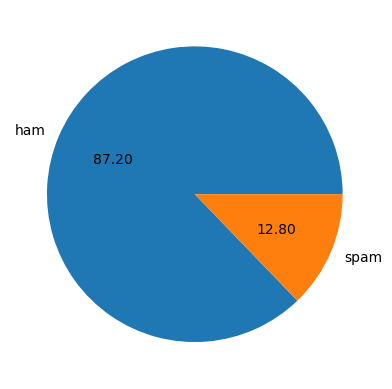

In [144]:
# Plotting a pie graph to see the relation b/w Spam and Not Spam data
plt.pie(df['Target'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')
plt.show()

In [145]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/syedmohammadalijafri/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [146]:
df['num_characters'] = df['Text'].apply(len)

/var/folders/zz/jtxdkwzx2vb9k8v6gyqr13200000gn/T/ipykernel_76402/3954161518.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['Text'].apply(len)


In [147]:
df.head()

,Target,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [148]:
# Number of words
df['num_words'] = df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

/var/folders/zz/jtxdkwzx2vb9k8v6gyqr13200000gn/T/ipykernel_76402/824559641.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [149]:
df.head()

,Target,Text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [150]:
df['num_sentences'] = df['Text'].apply(lambda x: len(nltk.sent_tokenize(x)))

/var/folders/zz/jtxdkwzx2vb9k8v6gyqr13200000gn/T/ipykernel_76402/3982308346.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences'] = df['Text'].apply(lambda x: len(nltk.sent_tokenize(x)))


In [151]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5179.000000,5179.000000,5179.000000
mean,79.291562,18.464568,1.966403
std,58.307183,13.315991,1.447561
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,117.500000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [152]:
# Ham
df[df['Target'] == 0][[ 'num_characters', 'num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.684234,17.123782,1.820195
std,56.435582,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [153]:
#Spam
df[df['Target'] == 1][[ 'num_characters', 'num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,663.000000,663.000000,663.000000
mean,137.920060,27.597285,2.962293
std,30.358502,7.017401,1.481027
min,13.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,158.000000,32.000000,4.000000
max,225.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

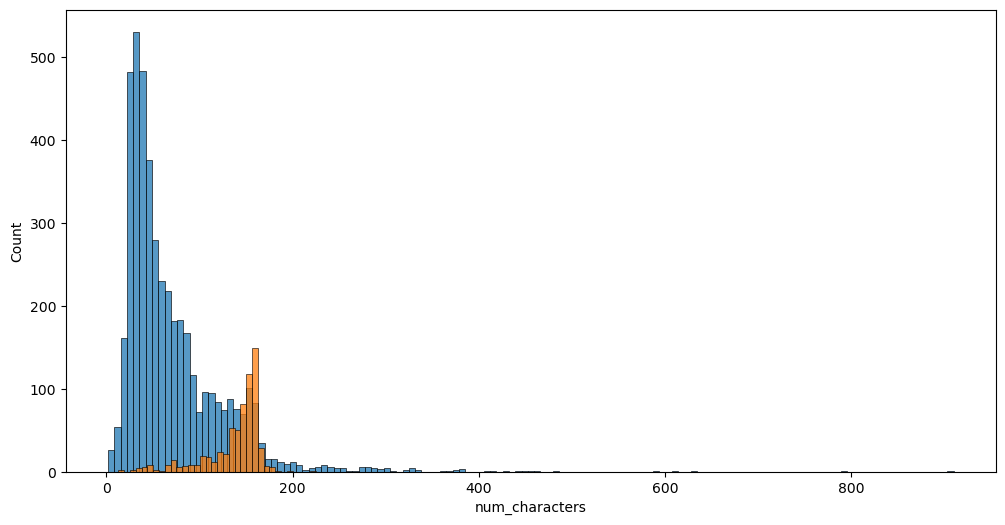

In [154]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['Target'] == 0]['num_characters'])
sns.histplot(df[df['Target'] == 1]['num_characters'])

<Axes: xlabel='num_words', ylabel='Count'>

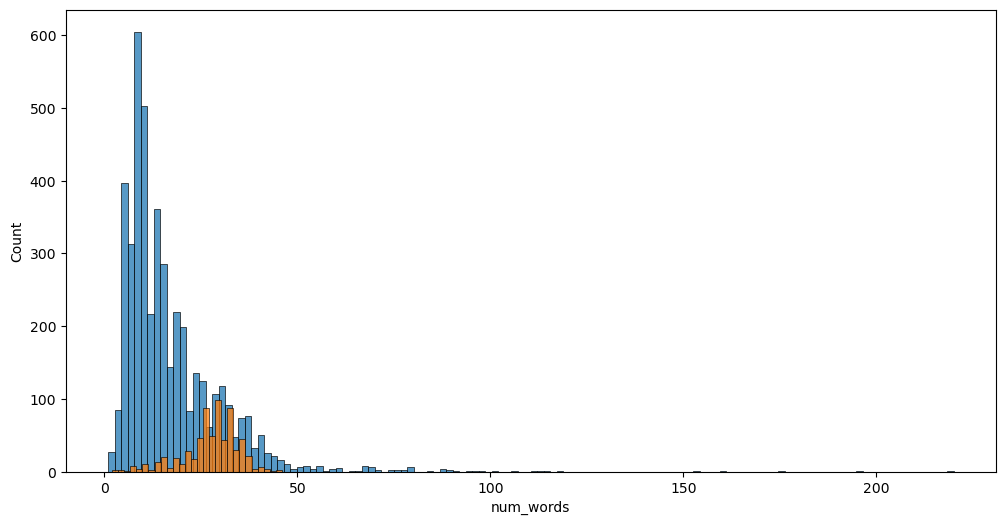

In [155]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['Target'] == 0]['num_words'])
sns.histplot(df[df['Target'] == 1]['num_words'])

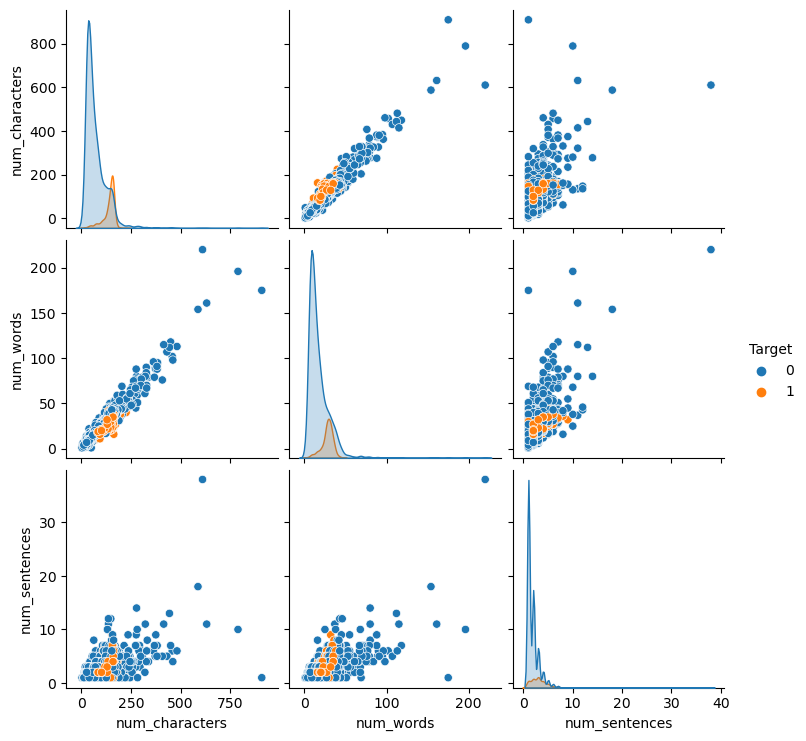

In [156]:
sns.pairplot(df, hue="Target")

<Axes: >

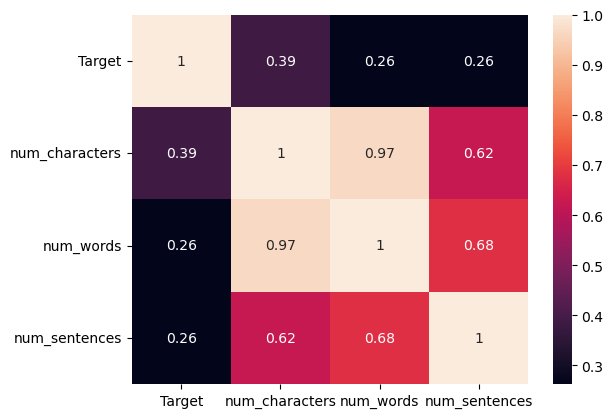

In [157]:
df_numeric = df.drop(columns=['Text'])
sns.heatmap(df_numeric.corr(), annot=True)

In [158]:
ps  = PorterStemmer()
import string 
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y=[]
    for i in text :
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [159]:
transform_text("I loved the YT videos on machine learning. How about you ? ") # type: ignore

'love yt video machin learn'

In [160]:
df["transformed_text"] = df['Text'].apply(transform_text)

/var/folders/zz/jtxdkwzx2vb9k8v6gyqr13200000gn/T/ipykernel_76402/815658176.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["transformed_text"] = df['Text'].apply(transform_text)


In [161]:
df

,Target,Text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5577,1,Microsoft has detected a virus on your compute...,93,16,2,microsoft detect viru comput call number immed...
5578,1,Invest in our new cryptocurrency and earn 100%...,100,21,2,invest new cryptocurr earn 100 return one mont...
5579,1,"Hi, I saw your profile and I think we have a l...",129,32,3,hi saw profil think lot common let chat get kn...
5580,1,Complete this short survey and win a $100 gift...,84,19,2,complet short survey win 100 gift card click s...


In [162]:
wc = WordCloud(width=500, height=500, min_font_size=10, background_color="white")

In [163]:
spam_wc = wc.generate(df[df['Target'] == 1]['transformed_text'].str.cat(sep=" "))
ham_wc = wc.generate(df[df['Target'] == 0]['transformed_text'].str.cat(sep=" "))

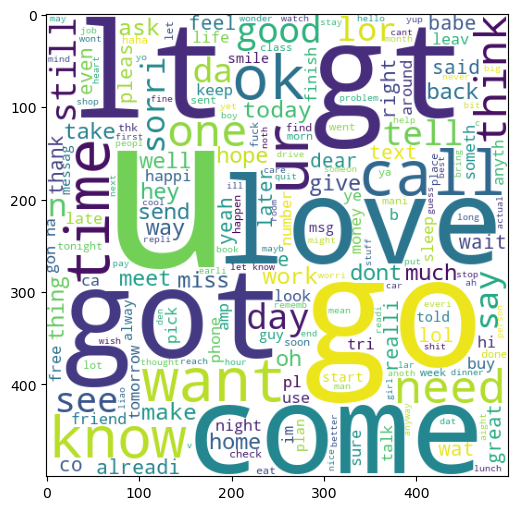

In [164]:
plt.figure(figsize=(12, 6))
plt.imshow(ham_wc)

In [165]:
df.head()

,Target,Text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [166]:
spam_corpus = []
for msg in  df[df['Target'] == 1]['transformed_text'].tolist():
    for words in msg.split():
        spam_corpus.append(words)

In [167]:
len(spam_corpus)

10041

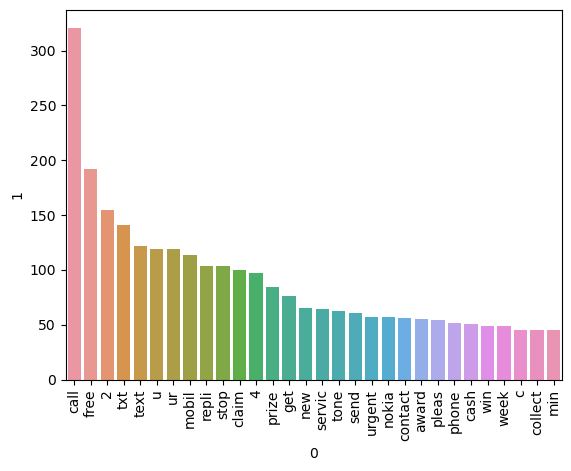

In [168]:
sns.barplot( x =pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1] )
plt.xticks(rotation='vertical')
plt.show()

In [169]:
ham_corpus = []
for msg in  df[df['Target'] == 0]['transformed_text'].tolist():
    for words in msg.split():
        ham_corpus.append(words)

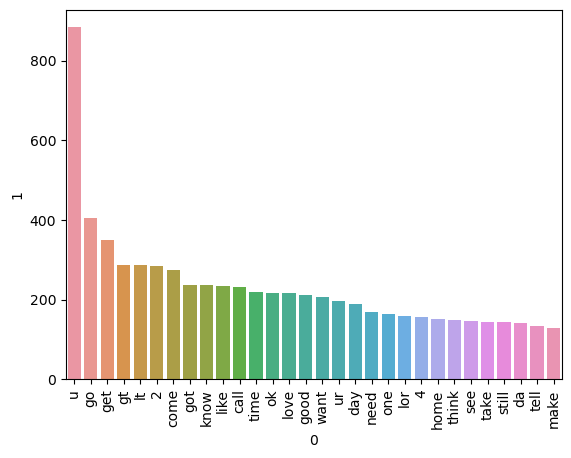

In [170]:
sns.barplot( x =pd.DataFrame(Counter(ham_corpus).most_common(30))[0], y = pd.DataFrame(Counter(ham_corpus).most_common(30))[1] )
plt.xticks(rotation='vertical')
plt.show()

In [171]:
# Building Model 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [172]:
x = tfidf.fit_transform(df['transformed_text']).toarray()

In [173]:
x.shape

(5179, 3000)

In [174]:
y = df['Target'].values

In [175]:
y

array([0, 0, 1, ..., 1, 1, 1])

In [176]:
from sklearn.model_selection import train_test_split


In [177]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=2)

In [178]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [179]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [180]:
gnb.fit(X_train, y_train)
ypred1 = gnb.predict(X_test)
print(accuracy_score(y_test, ypred1))
print(confusion_matrix(y_test, ypred1))
print(precision_score(y_test, ypred1))

0.8478764478764479
[[974 167]
 [ 30 124]]
0.4261168384879725


In [181]:
mnb.fit(X_train, y_train) # type: ignore
ypred1 = mnb.predict(X_test) # type: ignore
print(accuracy_score(y_test, ypred1)) # type: ignore
print(confusion_matrix(y_test, ypred1)) # type: ignore
print(precision_score(y_test, ypred1)) # type: ignore

0.9752895752895753
[[1141    0]
 [  32  122]]
1.0


In [182]:
bnb.fit(X_train, y_train)
ypred1 = bnb.predict(X_test) 
print(accuracy_score(y_test, ypred1)) 
print(confusion_matrix(y_test, ypred1))  
print(precision_score(y_test, ypred1))   

0.9814671814671815
[[1138    3]
 [  21  133]]
0.9779411764705882


In [183]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [184]:
svc = SVC(kernel='sigmoid', gamma=0.1)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bgc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [185]:
clfs = {
    'SVC': svc,
    'KN': knc,
    'NB': mnb, 
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bgc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb

}

In [186]:
def train_classifier(clf, x_train, y_train, x_test, y_test):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    return accuracy, precision

In [187]:
train_classifier(svc, X_train, y_train, X_test, y_test)

(0.9305019305019305, 0.9705882352941176)

In [188]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():

    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    print("For", name)
    print("Accuracy - ", current_accuracy)
    print("Precision - ", current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For SVC
Accuracy -  0.9305019305019305
Precision -  0.9705882352941176
For KN
Accuracy -  0.9258687258687258
Precision -  1.0
For NB
Accuracy -  0.9752895752895753
Precision -  1.0
For DT
Accuracy -  0.9366795366795366
Precision -  0.8272727272727273
For LR
Accuracy -  0.9590733590733591
Precision -  0.9316239316239316
For RF
Accuracy -  0.9776061776061776
Precision -  0.9921259842519685
For AdaBoost
Accuracy -  0.9637065637065637
Precision -  0.8962962962962963
For BgC
Accuracy -  0.9613899613899614
Precision -  0.8513513513513513
For ETC
Accuracy -  0.9776061776061776
Precision -  0.9844961240310077
For GBDT
Accuracy -  0.9598455598455599
Precision -  0.9553571428571429
For xgb
Accuracy -  0.9660231660231661
Precision -  0.9104477611940298


In [189]:
performance_df = pd.DataFrame({'Algorithim': clfs.keys(), 'Accuracy':accuracy_scores, 'Precision': precision_scores}) 

In [190]:
performance_df

,Algorithim,Accuracy,Precision
0,SVC,0.930502,0.970588
1,KN,0.925869,1.000000
2,NB,0.975290,1.000000
3,DT,0.936680,0.827273
4,LR,0.959073,0.931624
5,RF,0.977606,0.992126
6,AdaBoost,0.963707,0.896296
7,BgC,0.961390,0.851351
8,ETC,0.977606,0.984496
9,GBDT,0.959846,0.955357


In [191]:
performance_df_1 = pd.melt(performance_df, id_vars="Algorithim").sort_values('Algorithim')

In [192]:
performance_df_1 # type: ignore

,Algorithim,variable,value
17,AdaBoost,Precision,0.896296
6,AdaBoost,Accuracy,0.963707
18,BgC,Precision,0.851351
7,BgC,Accuracy,0.961390
14,DT,Precision,0.827273
3,DT,Accuracy,0.936680
19,ETC,Precision,0.984496
8,ETC,Accuracy,0.977606
20,GBDT,Precision,0.955357
9,GBDT,Accuracy,0.959846


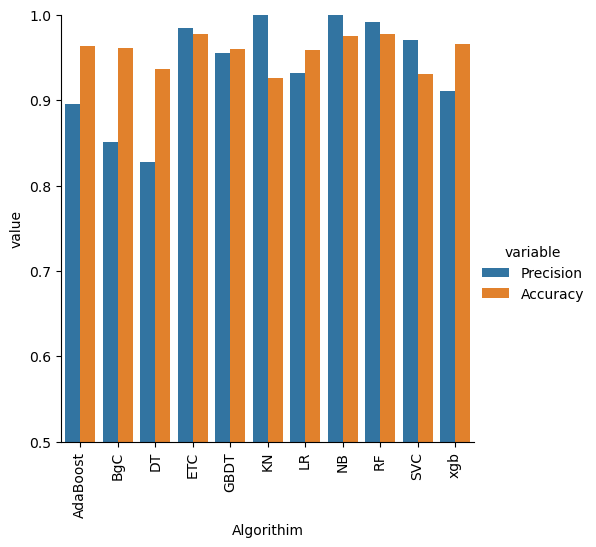

In [193]:
sns.catplot(x='Algorithim', y='value',
            hue='variable', data=performance_df_1, kind='bar', height=5)

plt.ylim(0.5, 1.0)
plt.xticks(rotation='vertical')
plt.show()

In [194]:
# model improvement 
temp_df = pd.DataFrame({'Algorithim': clfs.keys(), 'Accuracy_max_ft_3000': accuracy_scores, 'Precision_max_ft_3000': precision_scores})

In [195]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))